In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
data = [43, 49, 25, 22, 28, 36, 36, 28, 45, 21, 48, 49, 29, 25, 31, 23, 31, 40, 35, 32,
        18, 26, 43, 33, 36, 25, 38, 27, 39, 33, 26, 43, 32, 34, 35, 35, 44, 21, 31, 37]

In [36]:
x_min = min(data)
x_max = max(data)
n=len(data)

In [37]:
k=int(np.ceil(1 + 3.322 * np.log10(n)))
range_val = x_max-x_min
h=int(np.ceil(range_val/k))
x_start = x_min - h/2

In [38]:
intervals = [x_start + i * h for i in range(k + 1)]

In [39]:
frequencies = []
for i in range(k):
    lower_bound = intervals[i]
    upper_bound = intervals[i + 1]
    frequency = sum(1 for x in data if lower_bound <= x < upper_bound)
    frequencies.append(frequency)
print(frequencies)

[1, 7, 6, 11, 7, 5, 3]


In [40]:
table_data = {
    '(Xi, Xi+1)': [f"{intervals[i]:.0f}–{intervals[i+1]:.0f}" for i in range(len(intervals) - 1)],
    'ni': frequencies
}
df = pd.DataFrame(table_data)

In [41]:
#интервальный статистический ряд
print(df.to_string(index=False))

(Xi, Xi+1)  ni
     16–20   1
     20–26   7
     26–30   6
     30–36  11
     36–40   7
     40–46   5
     46–50   3


In [42]:
relative_frequencies = []
for j in frequencies:
  rel_fr = j/n
  relative_frequencies.append(rel_fr)


In [43]:
table_data_relv = {
    '(Xi, Xi+1)': [f"{intervals[i]:.0f}–{intervals[i+1]:.0f}" for i in range(len(intervals) - 1)],
    'ni/n': relative_frequencies
}
df_relv = pd.DataFrame(table_data_relv)

In [44]:
#распределение относительных частот
print(df_relv.to_string(index=False))

(Xi, Xi+1)  ni/n
     16–20 0.025
     20–26 0.175
     26–30 0.150
     30–36 0.275
     36–40 0.175
     40–46 0.125
     46–50 0.075


In [45]:
res_intervals = []
for i in range(k):
  res_intervals.append((intervals[i+1]+intervals[i])/2)

In [46]:
table_data_disc = {
    '(Xi)': [f"{res_intervals[i]:.0f}" for i in range(len(res_intervals))],
    'ni/n': relative_frequencies
}
df_disc = pd.DataFrame(table_data_disc)

In [47]:
#дискретный ряд распределения
print(df_disc.to_string(index=False))

(Xi)  ni/n
  18 0.025
  23 0.175
  28 0.150
  33 0.275
  38 0.175
  43 0.125
  48 0.075


In [48]:
#накопленные частоты
acc_freq_ni=[]
curr_sum = 0
for i in frequencies:
  curr_sum = i + curr_sum
  acc_freq_ni.append(curr_sum)
acc_freq_rel = []
curr_sum = 0
for i in relative_frequencies:
  curr_sum = i + curr_sum
  acc_freq_rel.append(curr_sum)
print(acc_freq_rel)

[0.025, 0.19999999999999998, 0.35, 0.625, 0.8, 0.925, 1.0]


In [49]:
table_data_acc = {
    '(Xi)': [f"{res_intervals[i]:.0f}" for i in range(len(res_intervals))],
    'ni': acc_freq_ni,
    'ni/n': [f"{acc_freq_rel[i]:.3f}" for i in range(len(acc_freq_rel))]
}
df_acc = pd.DataFrame(table_data_acc)

In [50]:
print(df_acc.to_string(index=False))

(Xi)  ni  ni/n
  18   1 0.025
  23   8 0.200
  28  14 0.350
  33  25 0.625
  38  32 0.800
  43  37 0.925
  48  40 1.000


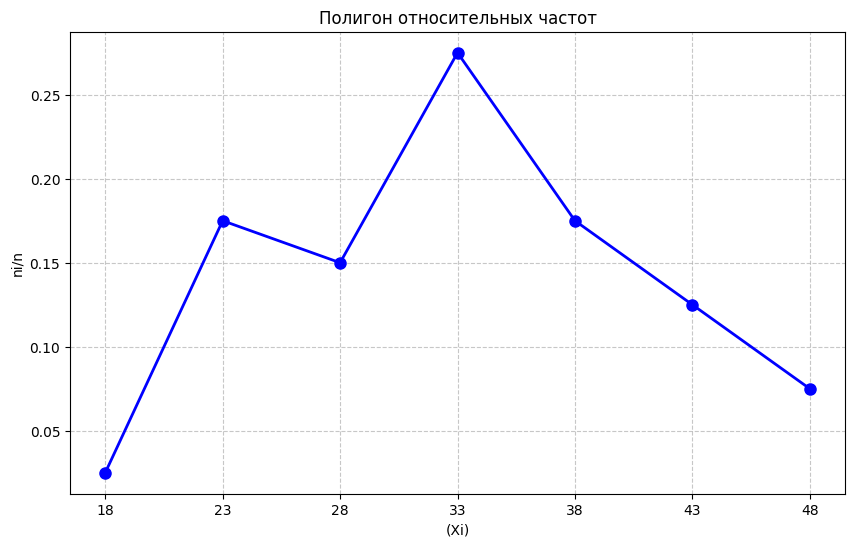

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(table_data_disc['(Xi)'], table_data_disc['ni/n'], marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)

plt.title('Полигон относительных частот')
plt.xlabel('(Xi)')
plt.ylabel('ni/n')
plt.grid(linestyle='--', alpha=0.7)

plt.show()

Полигон относительных частот соответствует графику плотности распределения

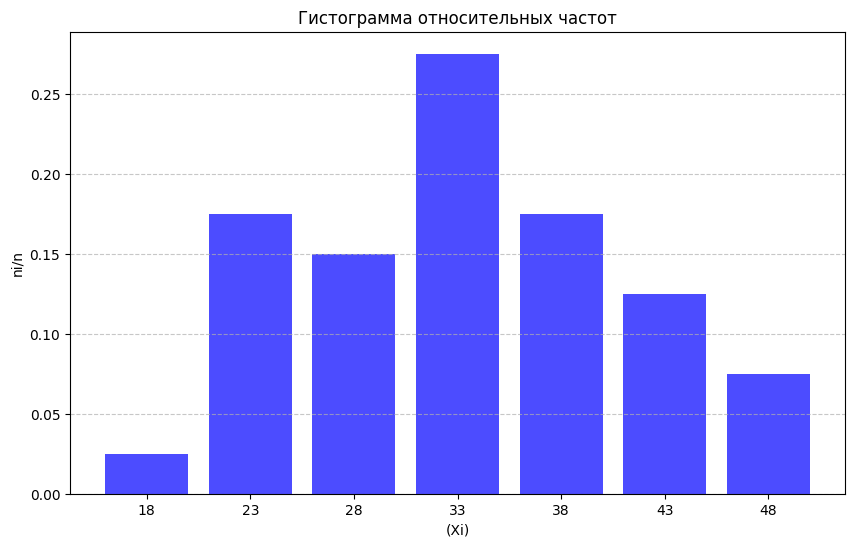

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(table_data_disc['(Xi)'], table_data_disc['ni/n'], color='blue', alpha=0.7)

plt.title('Гистограмма относительных частот')
plt.xlabel('(Xi)')
plt.ylabel('ni/n')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Гистограмма относительных частот соответствует графику плотности распределения

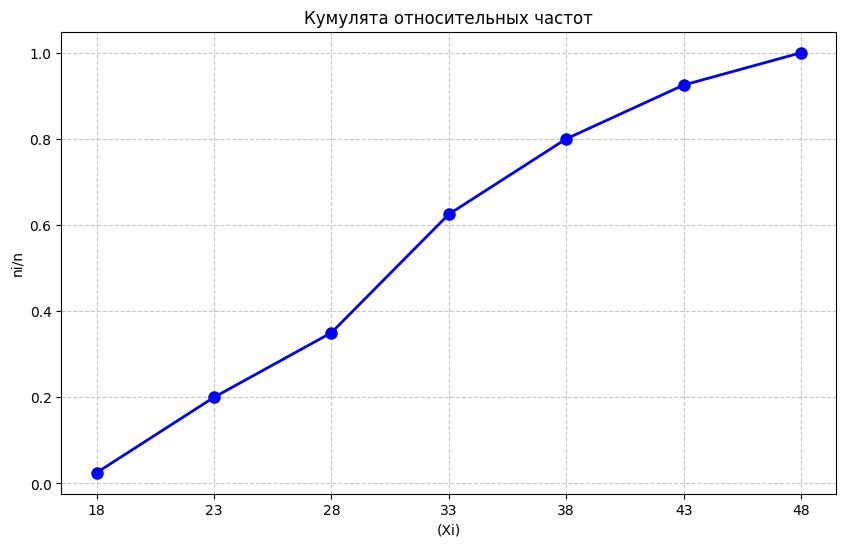

In [53]:

plt.figure(figsize=(10, 6))
plt.plot(res_intervals, acc_freq_rel, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)

plt.title('Кумулята относительных частот')
plt.xlabel('(Xi)')
plt.ylabel('ni/n')
plt.grid(linestyle='--', alpha=0.7)

plt.xticks(res_intervals)

plt.show()

Кумулята относительных частот соответсвует функции распределения

In [54]:
output = []
output.append(f"Если x ≤ {res_intervals[0]}, то F(x) = 0;")
for i in range(len(res_intervals) - 1):
    lower_bound = res_intervals[i]
    upper_bound = res_intervals[i + 1]
    f_value = acc_freq_rel[i]
    output.append(f"Если {lower_bound} < x ≤ {upper_bound}, то F(x) = {f_value:.3f};")

output.append(f"Если x > {res_intervals[len(res_intervals)-1]}, то F(x) = 1;")
for line in output:
    print(line)

Если x ≤ 18.0, то F(x) = 0;
Если 18.0 < x ≤ 23.0, то F(x) = 0.025;
Если 23.0 < x ≤ 28.0, то F(x) = 0.200;
Если 28.0 < x ≤ 33.0, то F(x) = 0.350;
Если 33.0 < x ≤ 38.0, то F(x) = 0.625;
Если 38.0 < x ≤ 43.0, то F(x) = 0.800;
Если 43.0 < x ≤ 48.0, то F(x) = 0.925;
Если x > 48.0, то F(x) = 1;


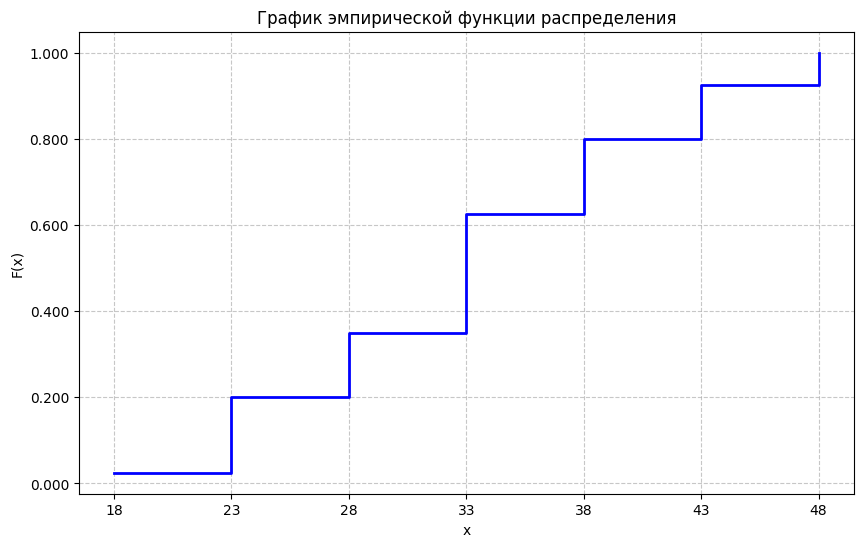

In [55]:
x_values_extended = res_intervals
y_values_extended = acc_freq_rel
plt.figure(figsize=(10, 6))
plt.step(x_values_extended, y_values_extended, where='post', color='blue', linewidth=2)

plt.title('График эмпирической функции распределения')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(linestyle='--', alpha=0.7)

plt.xticks(x_values_extended)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.3f}"))

plt.show()

In [56]:
#вычисление моды
n_mo=max(frequencies)
i_mo = frequencies.index(n_mo)
x_o = intervals[i_mo]
n_mo1 = frequencies[i_mo -1]
n_mo2 = frequencies[i_mo +1]
mo = x_o + h * (n_mo - n_mo1) / (2*n_mo - n_mo1 - n_mo2)

In [57]:
#вычисление медианы
n_2 = n/2
i_me_max = max(res_intervals)
n_me = frequencies[i_mo]
s_me1=acc_freq_ni[i_mo-1]
x_me = x_o + h*((n/2-s_me1)/n_me)

In [58]:
#метод произведений
n_ui = max(frequencies)
i_ui = frequencies.index(n_ui)
ui = [i - i_ui for i in range(h*2+1)]
niui = [frequencies[i]*ui[i] for i in range(len(frequencies))]
sum_niui = sum(niui)
niui2 = [frequencies[i]*ui[i]*ui[i] for i in range(len(frequencies))]
sum_niui2 = sum(niui2)
niui3 = [frequencies[i]*ui[i]*ui[i]*ui[i] for i in range(len(frequencies))]
sum_niui3 = sum(niui3)
niui4 = [frequencies[i]*ui[i]*ui[i]*ui[i]*ui[i] for i in range(len(frequencies))]
sum_niui4 = sum(niui4)
c = res_intervals[i_ui]
#условные начальные моменты
M1 = sum_niui/n
M2 = sum_niui2/n
M3 = sum_niui3/n
M4 = sum_niui4/n
#центральные эмперические моменты
m3 = (M3-3*M1*M2+2*M1*M1*M1)*h*h*h
m4 = (M4-4*M1*M3+6*M1*M1*M2-3*M1*M1*M1*M1)*h*h*h*h
x_в = M1*h+c
Dв= (M2-M1*M1)*h*h
sigma = pow(Dв,0.5)
Ac = m3/pow(sigma,3)
Ek = m4/pow(sigma,4)-3
V = sigma/x_в*100
print("Мода:",mo)
print("Медиана:", x_me)
print("Выборочная средняя:", x_в)
print("Выборочная дисперсия:", Dв)
print("Среднее квадратичное отклонение:", sigma)
print("Выборочный коэффициент вариации:", V)
print("Коэффициент ассимтерии:", Ac)
print("Коэффициент эксцесса:", Ek)

Мода: 33.27777777777778
Медиана: 33.22727272727273
Выборочная средняя: 33.375
Выборочная дисперсия: 60.484374999999986
Среднее квадратичное отклонение: 7.777170115151139
Выборочный коэффициент вариации: 23.30238236749405
Коэффициент ассимтерии: 0.11432324709044235
Коэффициент эксцесса: -0.7766249455025305


In [59]:
from math import pi
from math import exp
xi_xв = [res_intervals[i]-x_в for i in range(len(res_intervals))]
ui = [xi_xв[i]/sigma for i in range(len(xi_xв))]
fi = [1/pow(2*pi,0.5)*exp(-ui[i]**2/2) for i in range(len(ui))]
ni_= [n*h/sigma*fi[i] for i in range(len(fi))]
ni_bild = [round(ni_[i],0) for i in range(len(fi))]

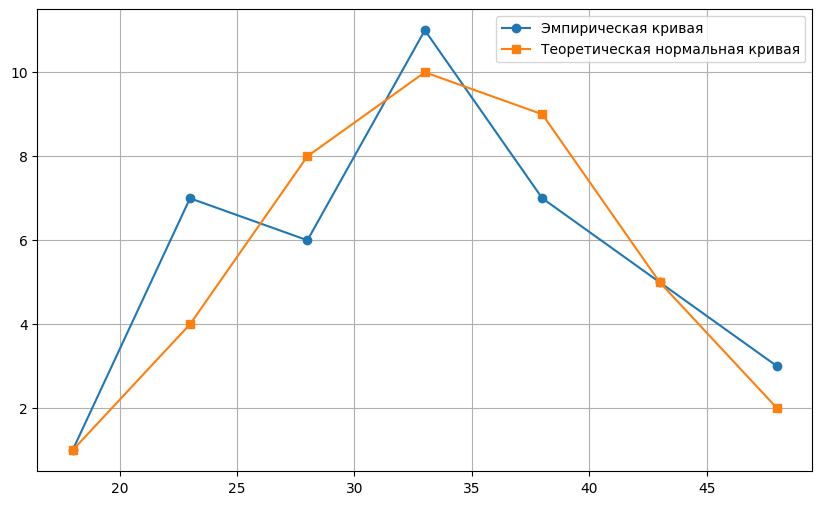

In [60]:
#построение нормальной кривой
plt.figure(figsize=(10, 6))
plt.plot(res_intervals, frequencies, label='Эмпирическая кривая', marker='o')
plt.plot(res_intervals, ni_bild, label='Теоретическая нормальная кривая', marker='s')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
#проверка гипотезы о нормальности X при уровне значимости alpha=0.025
from scipy.stats import chi2
ni_ni_ = [frequencies[i] - ni_bild[i] for i in range(len(ni_bild))]
ni_ni_2 = [ni_ni_[i]**2 for i in range(len(ni_ni_))]
st5 = [ni_ni_2[i]/ni_bild[i] for i in range(len(ni_ni_))]
st6 = [frequencies[i]**2 for i in range(len(ni_ni_))]
st7 = [st6[i]/ni_bild[i] for i in range(len(ni_ni_))]
x_набл = sum(st5)
v = 9 - 2 -1
a = 0.025
x_кр = chi2.ppf(1 - a, v)
if (x_набл < x_кр):
  print("Гипотеза не отвергается, т.к.",x_набл, "<", x_кр)
else:
  print("Гипотеза отвергается, т.к.",x_набл, ">", x_кр)

Гипотеза не отвергается, т.к. 3.7944444444444443 < 14.44937533544792


In [62]:
#нахождение доверительного интервала для неизвестного матожидания и среднего квадратичного отклонения
from scipy.stats import norm
y = 0.95
t = 1.96
mл = x_в - t*sigma/pow(n,0.5)
mпр = x_в + t*sigma/pow(n,0.5)
print(mл,"<", "M(x)","<",mпр)
q = 0.24
cл = sigma*(1-q)
cпр = sigma*(1+q)
print(cл,"<", "ср.кв.откл","<",cпр)

30.964830011181785 < M(x) < 35.78516998881822
5.9106492875148655 < ср.кв.откл < 9.643690942787412
